In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")
    
sns.set(style="whitegrid")

m_range = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [2]:
def read_data (filename, skip_rows = 9, treshold = 6):

    m_range = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]

    df = pd.read_csv( filename, skiprows = skip_rows, names= m_range)
    df.drop( [0, 150, 160], axis = 1, inplace = True)

    df.dropna(inplace = True)
    
    #while len(df[10]) > 200:
    #    df.drop( [len(df[10])-2], axis = 0, inplace = True)
    
    if len(df[10]) < 400:
        print("WARNING! Less than 400 samples in file: {:}, k = {:}".format(filename, len(df[10])))
    
    return df #df.astype(dtype = 'int32')

In [3]:
def single_histogram(df, df0, n, limit = [200, 300, 400, 500, 500,500, 500],
                     filename = 'test.png', k = 50, start_value = 20):
    
    fig, axs = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize = (15,20))
       
    for row in axs:
        for ax in row:               
            ax.xaxis.label.set_size(12)
            #ax.set_ylim([0,1])
            ax.set_xlabel('time', ha = 'right', va = 'top', fontsize = 15)           
            ax.tick_params(grid_color='gray', grid_alpha=0.5, labelcolor = "black", labelsize = 15)      
            ax.grid(True)

    j = 0
    
    for i in range (4):
        m = start_value + i*40
        
        axs[i][0].hist(df[m], k, color= 'purple', alpha=0.3, normed = True, 
                        label = 'n = {:}'.format(n), range = (0, limit[i]))       
        
        axs[i][1].hist(df0[m], k, color= 'gray', alpha=0.75, normed = True, range = (0, limit[i]))

        axs[i][0].set_title('range {:}'.format(m), fontsize = 20)
        axs[i][1].set_title('range {:}'.format(m), fontsize = 20)
        
        axs[i][0].set_xlim([0,limit[i]])
        axs[i][1].set_xlim([0,limit[i]])
       
        axs[i][0].legend( loc='upper right', fontsize = 15, 
                         title = 'number of long links', title_fontsize = 18)
           
    
    fig.tight_layout()      
    fig.savefig(filename)
    
    return

    

In [4]:
def multi_histogram(df1, df2, df3, df4, df5, df0, limit = [200, 300, 400, 500, 500,500, 500],
                    filename = 'test.png', k = 50, start_value = 20):
    
    fig, axs = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize = (15,20))
       
    for row in axs:
        for ax in row:               
            ax.xaxis.label.set_size(12)
            #ax.set_ylim([0,1])
            ax.set_xlabel('time', ha = 'right', va = 'top', fontsize = 15)           
            ax.tick_params(grid_color='gray', grid_alpha=0.5, labelcolor = "black", labelsize = 15)      
            ax.grid(True)

    j = 0
    
    for i in range (4):
        m = start_value + i*40
        
        axs[i][0].hist(df5[m], k, color= 'orange', alpha=0.3, normed = True, 
                        label = 'n = 9', range = (0, limit[i]))       
        
        axs[i][0].hist(df4[m], k, color= 'limegreen', alpha=0.3, normed = True, 
                       label = 'n = 18', range = (0, limit[i]))
        
        axs[i][0].hist(df3[m], k, color= 'dodgerblue', alpha=0.3, normed = True,
                       label = 'n = 45', range = (0, limit[i]))       
        
        axs[i][0].hist(df2[m], k, color= 'darkorchid', alpha=0.3, normed = True, 
                       label = 'n = 90', range = (0, limit[i]))
        
        axs[i][0].hist(df1[m], k, color= 'fuchsia', alpha=0.3, normed = True, 
                       label = 'n = 180', range = (0, limit[i]))
        
        
        
        axs[i][1].hist(df0[m], k, color= 'gray', alpha=0.75, normed = True, range = (0, limit[i]))

        axs[i][0].set_title('range {:}'.format(m), fontsize = 20)
        axs[i][1].set_title('range {:}'.format(m), fontsize = 20)
        
        axs[i][0].set_xlim([0,limit[i]])
        axs[i][1].set_xlim([0,limit[i]])
       
        axs[i][0].legend( loc='upper right', fontsize = 15, 
                         title = 'number of long links', title_fontsize = 18)
           
    
    fig.tight_layout()      
    fig.savefig(filename)
    
    return


## X = 50, $\lambda = 1$

In [5]:
df_9 = read_data('n9c15X50l07.csv')
df_18 = read_data('n18c15X50l07.csv')
df_45 = read_data('n45c15X50l07.csv')
df_90 = read_data('n90c15X50l07.csv')
df_180 = read_data('n180c15X50l07.csv')
df_450 = read_data('n450c15X50l07.csv')
df_900 = read_data('n900c15X50l07.csv')

df_0 = read_data('n0c15X50l07.csv')

WARNING! Less than 400 samples in file: n9c15X50l07.csv, k = 254
WARNING! Less than 400 samples in file: n18c15X50l07.csv, k = 285
WARNING! Less than 400 samples in file: n45c15X50l07.csv, k = 126
WARNING! Less than 400 samples in file: n90c15X50l07.csv, k = 220
WARNING! Less than 400 samples in file: n180c15X50l07.csv, k = 200
WARNING! Less than 400 samples in file: n0c15X50l07.csv, k = 343


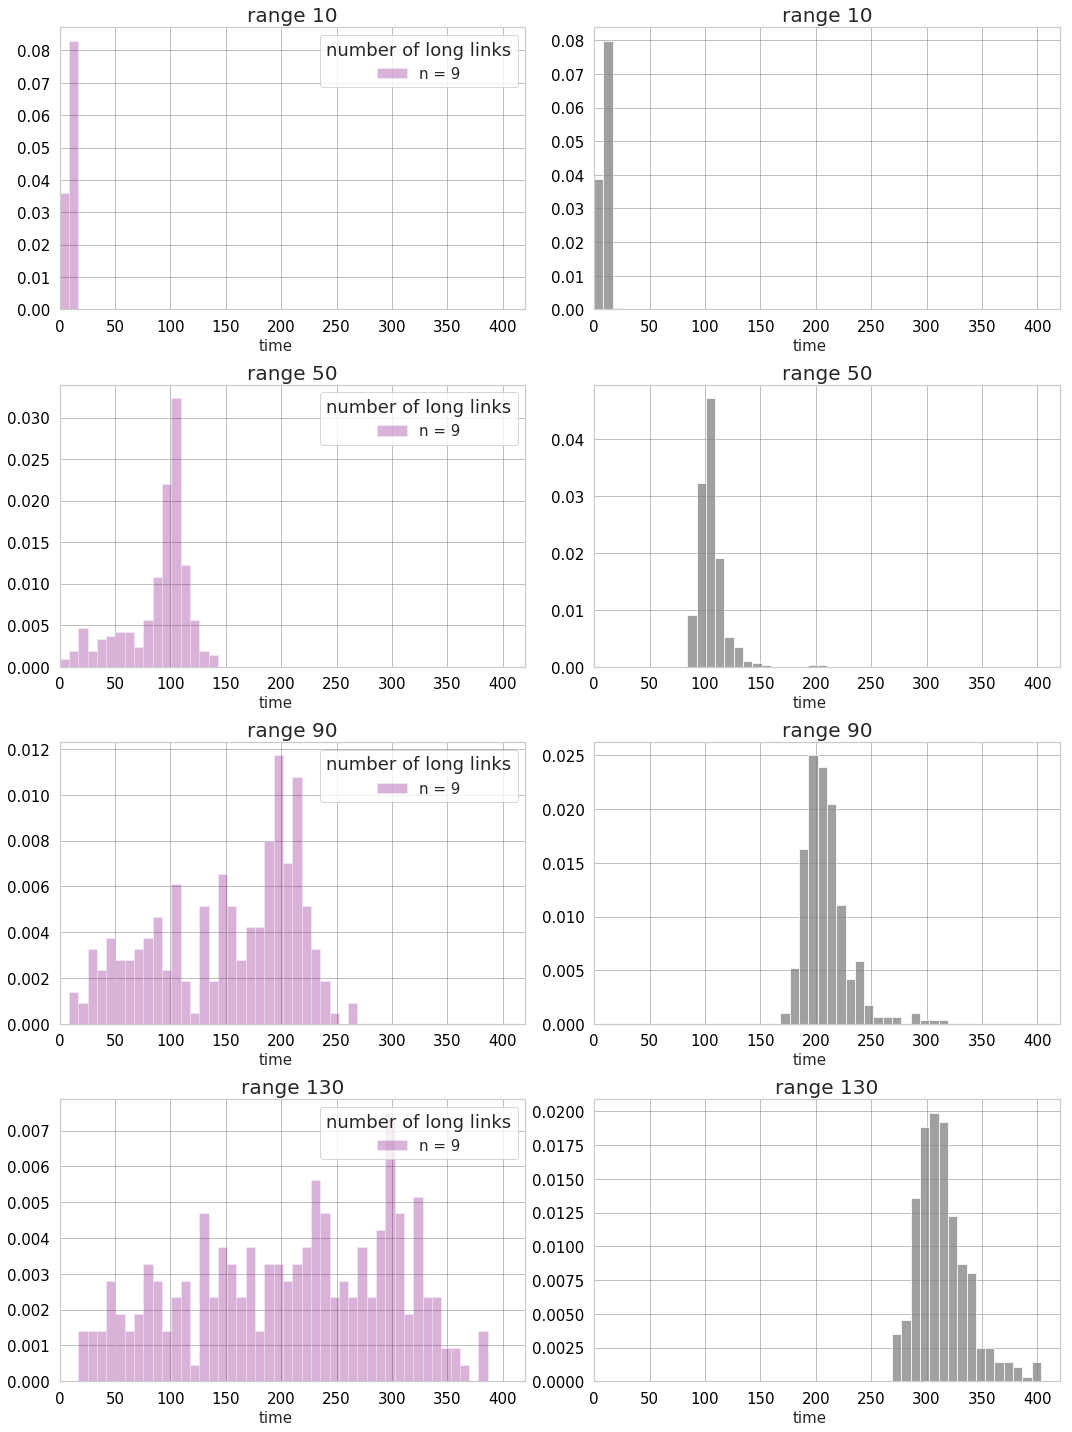

In [6]:
single_histogram(df_9, df_0, k = 50, start_value = 10, n = 9,
                 limit = [420, 420, 420, 420, 420, 420, 420])

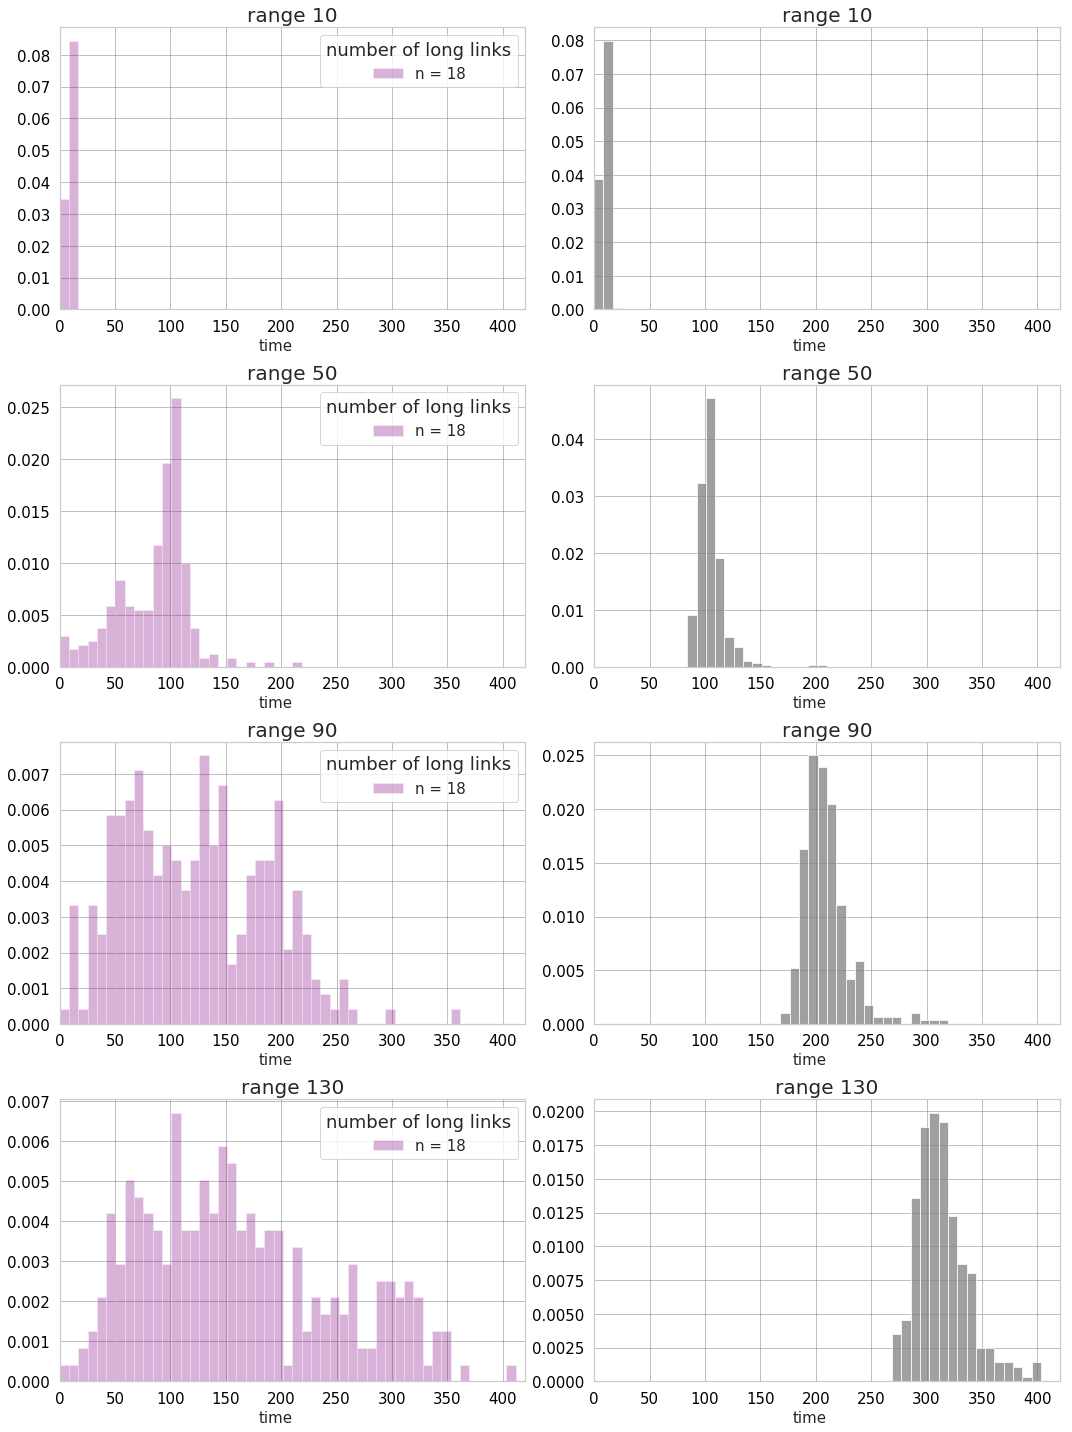

In [17]:
single_histogram(df_18, df_0, k = 50, start_value = 10, n = 18,
                 limit = [420, 420, 420, 420, 420, 420, 420])

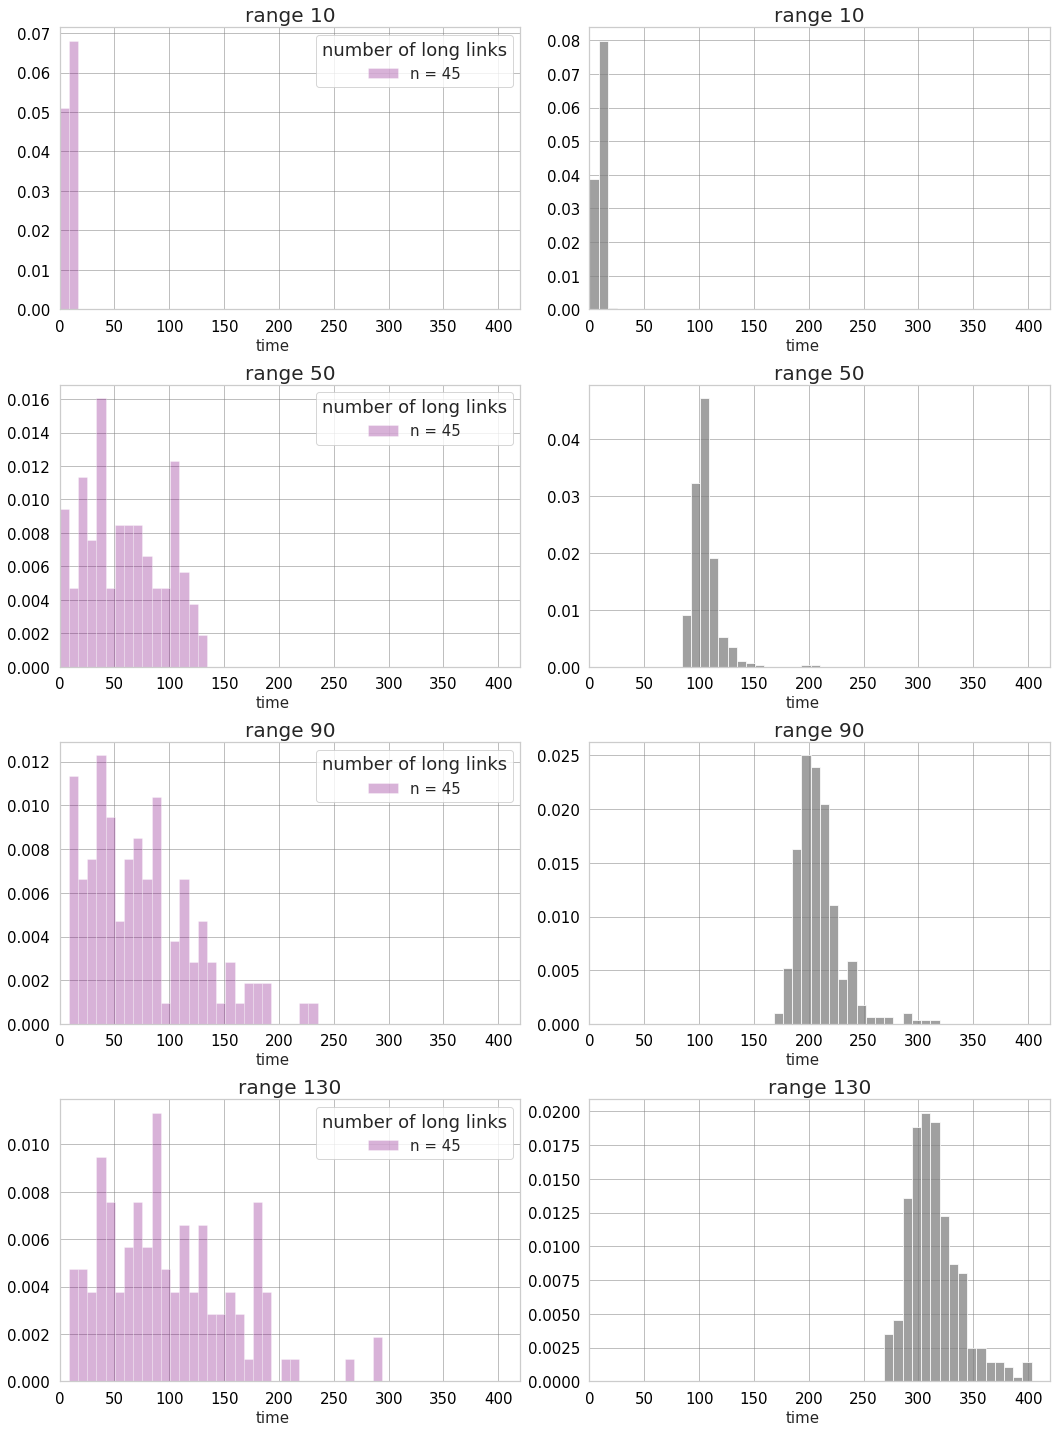

In [8]:
single_histogram(df_45, df_0, k = 50, start_value = 10, n = 45,
                 limit = [420, 420, 420, 420, 420, 420, 420])

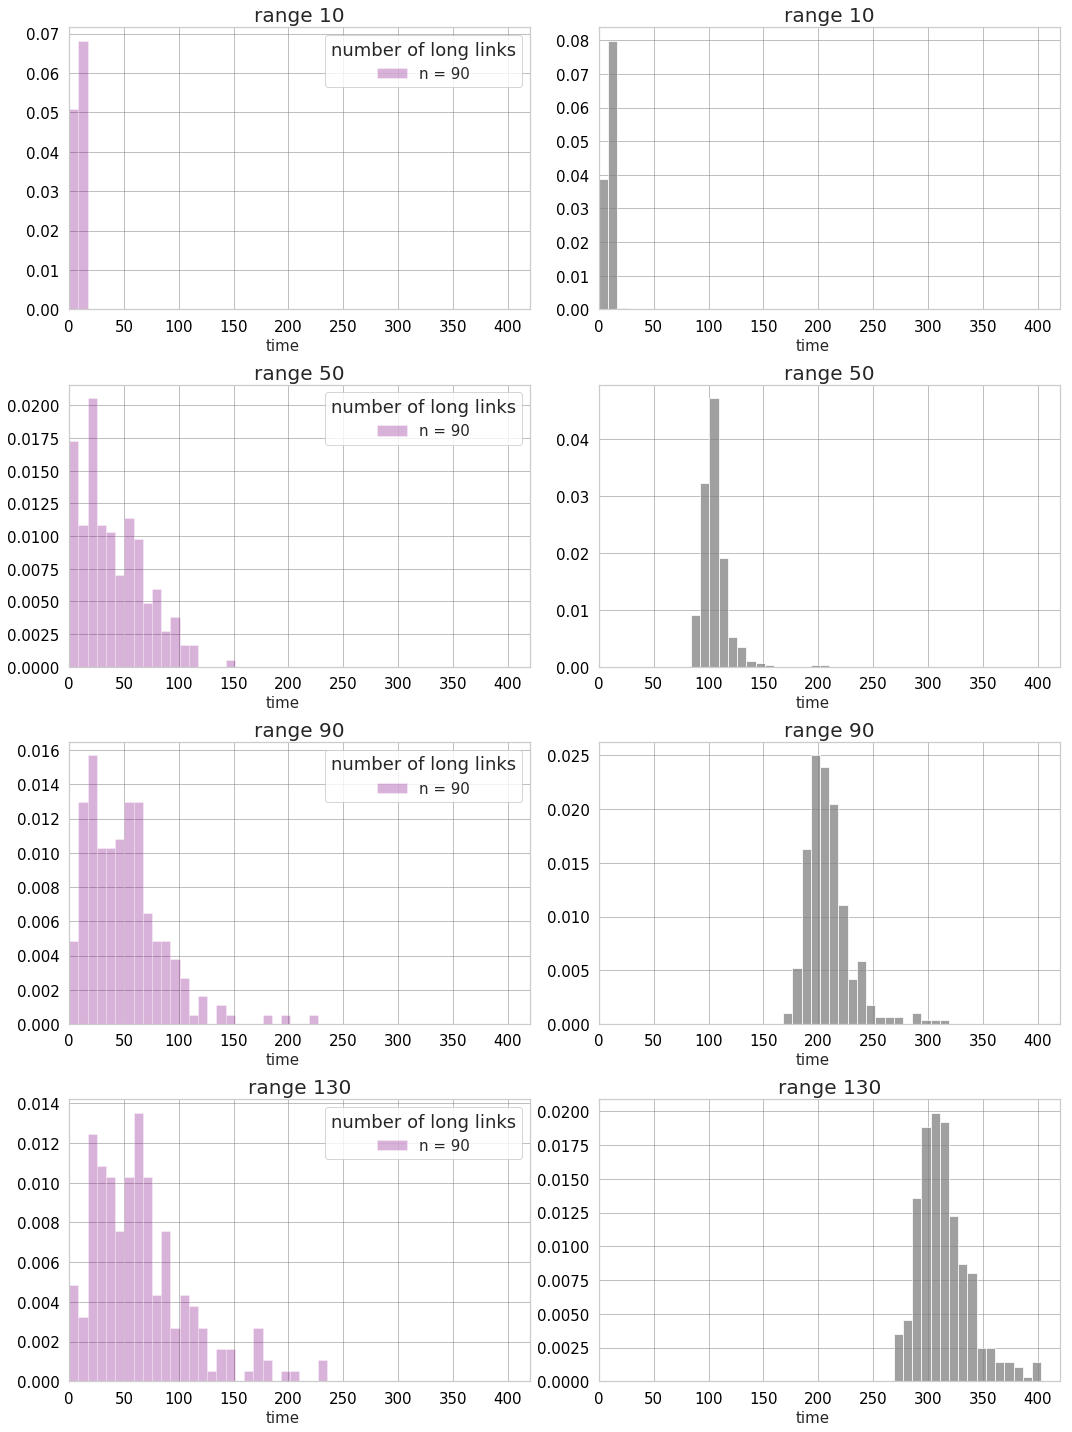

In [9]:
single_histogram(df_90, df_0, k = 50, start_value = 10, n = 90,
                 limit = [420, 420, 420, 420, 420, 420, 420])

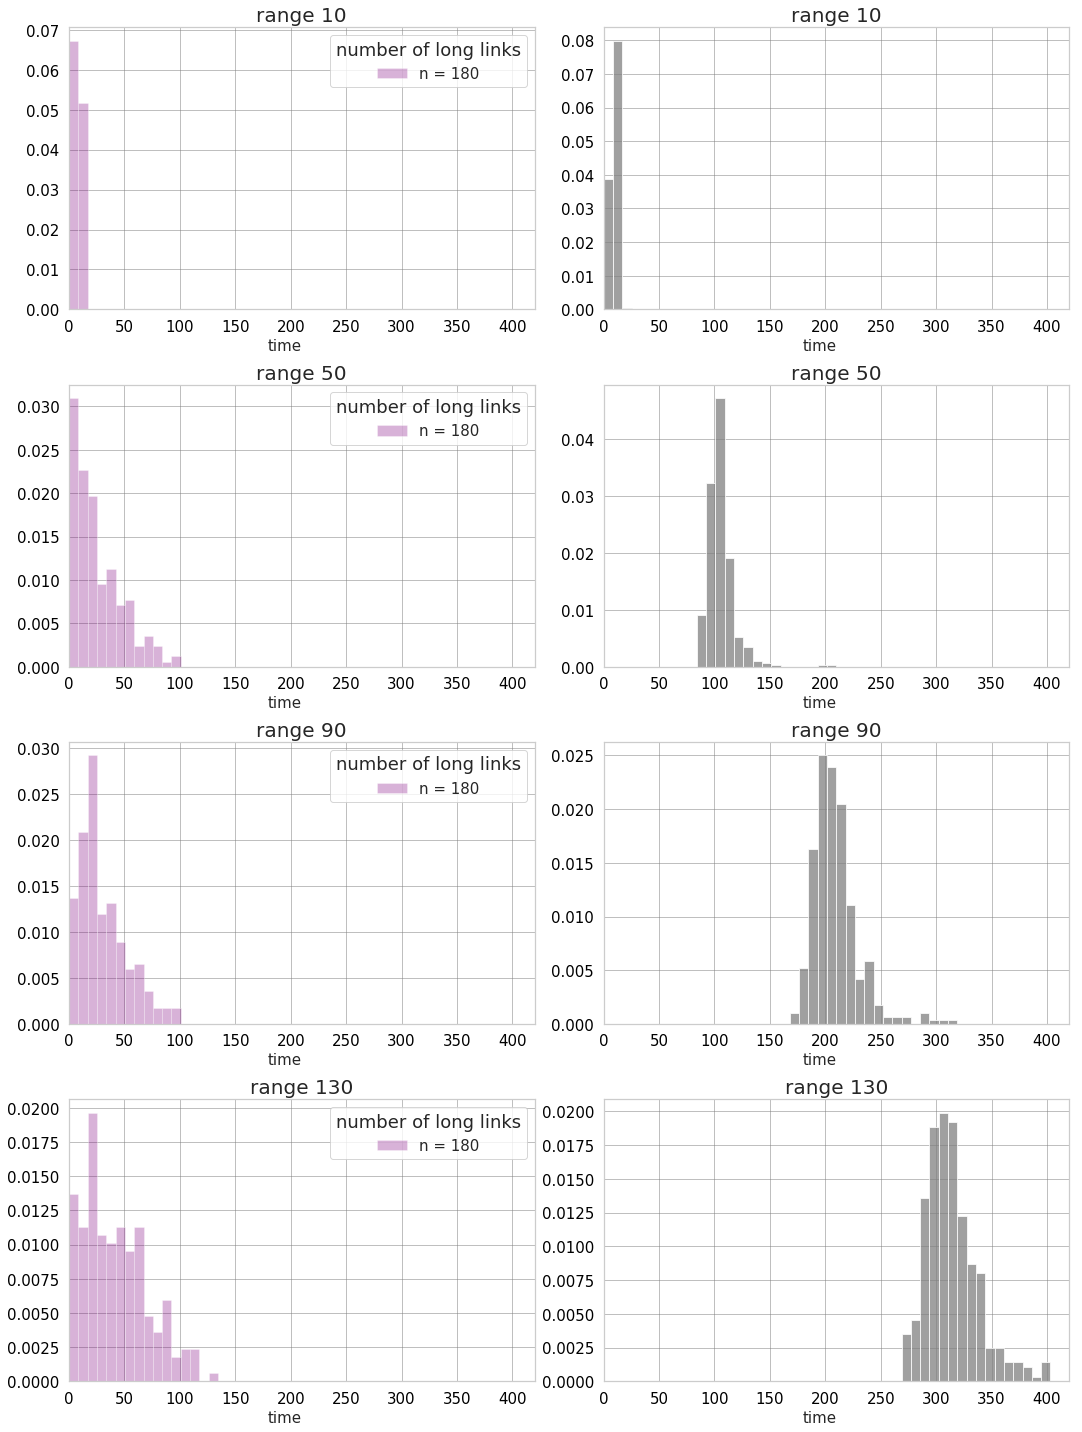

In [10]:
single_histogram(df_180, df_0, k = 50, start_value = 10, n = 180,
                 limit = [420, 420, 420, 420, 420, 420, 420])

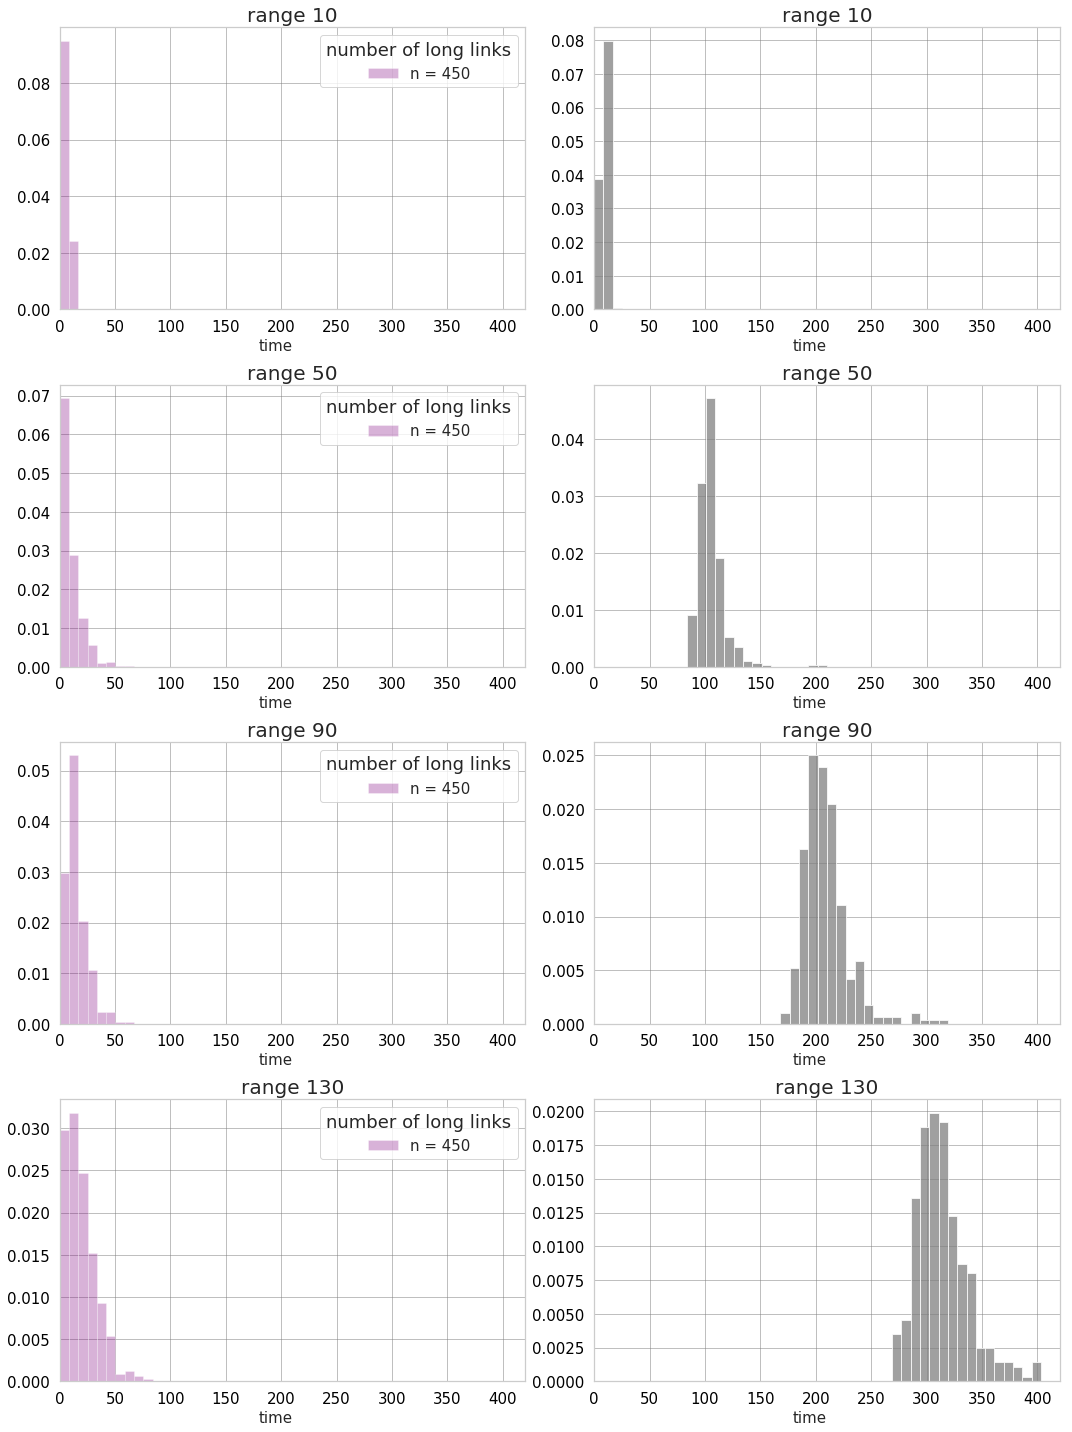

In [11]:
single_histogram(df_450, df_0, k = 50, start_value = 10, n = 450,
                 limit = [420, 420, 420, 420, 420, 420, 420])

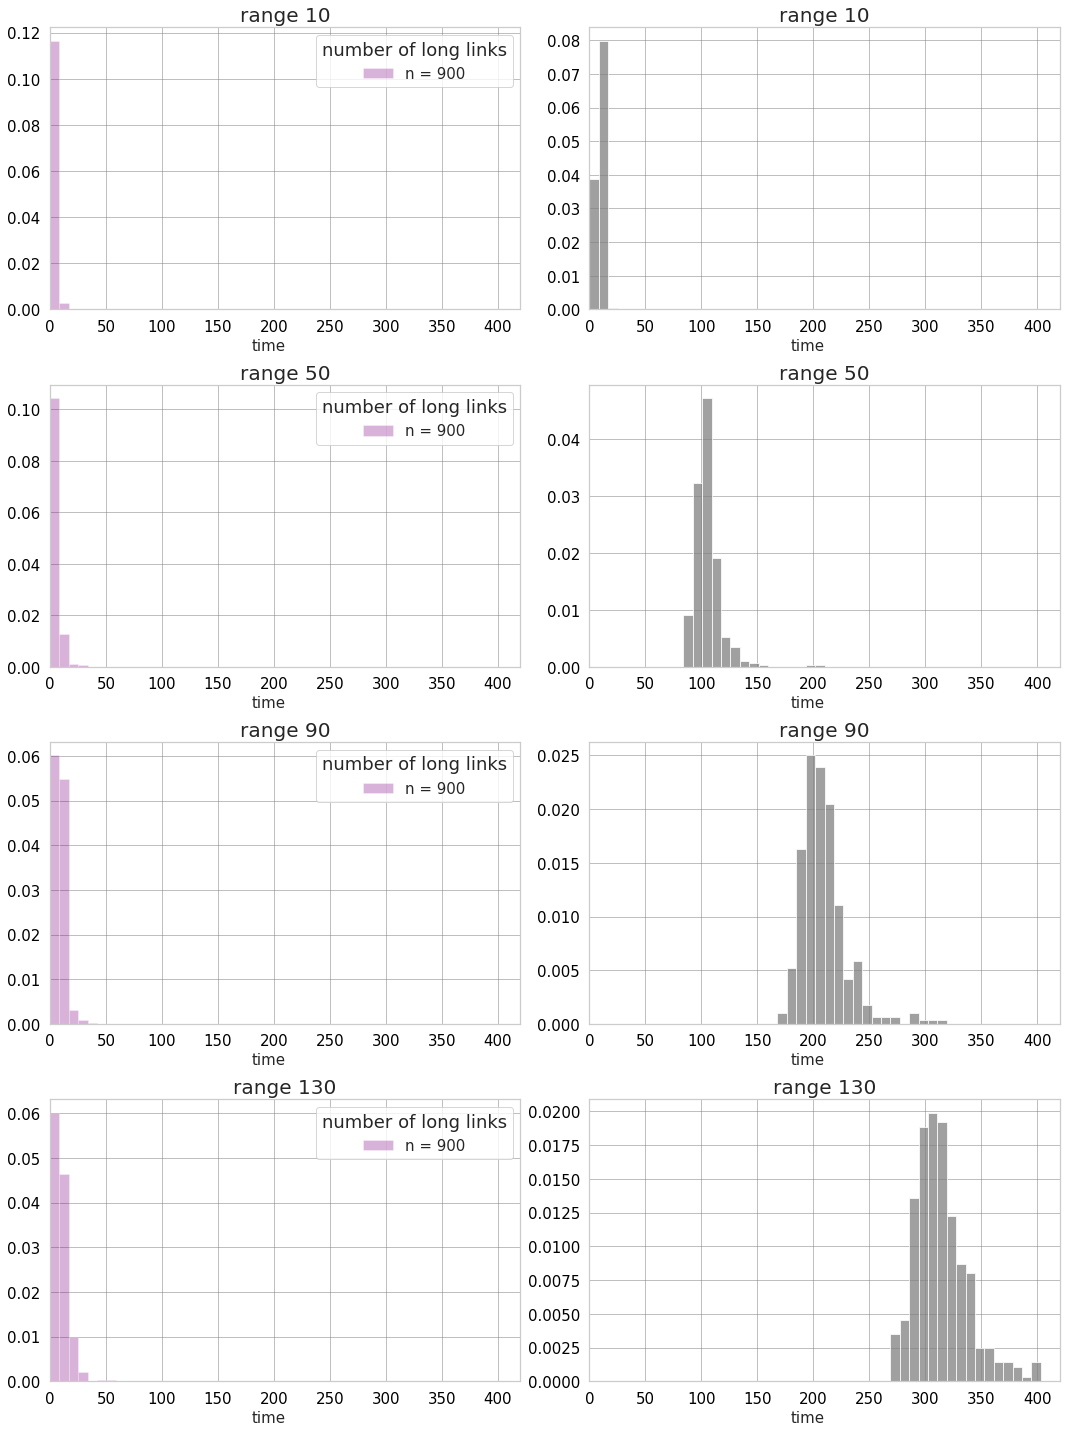

In [12]:
single_histogram(df_900, df_0, k = 50, start_value = 10, n = 900,
                 limit = [420, 420, 420, 420, 420, 420, 420])

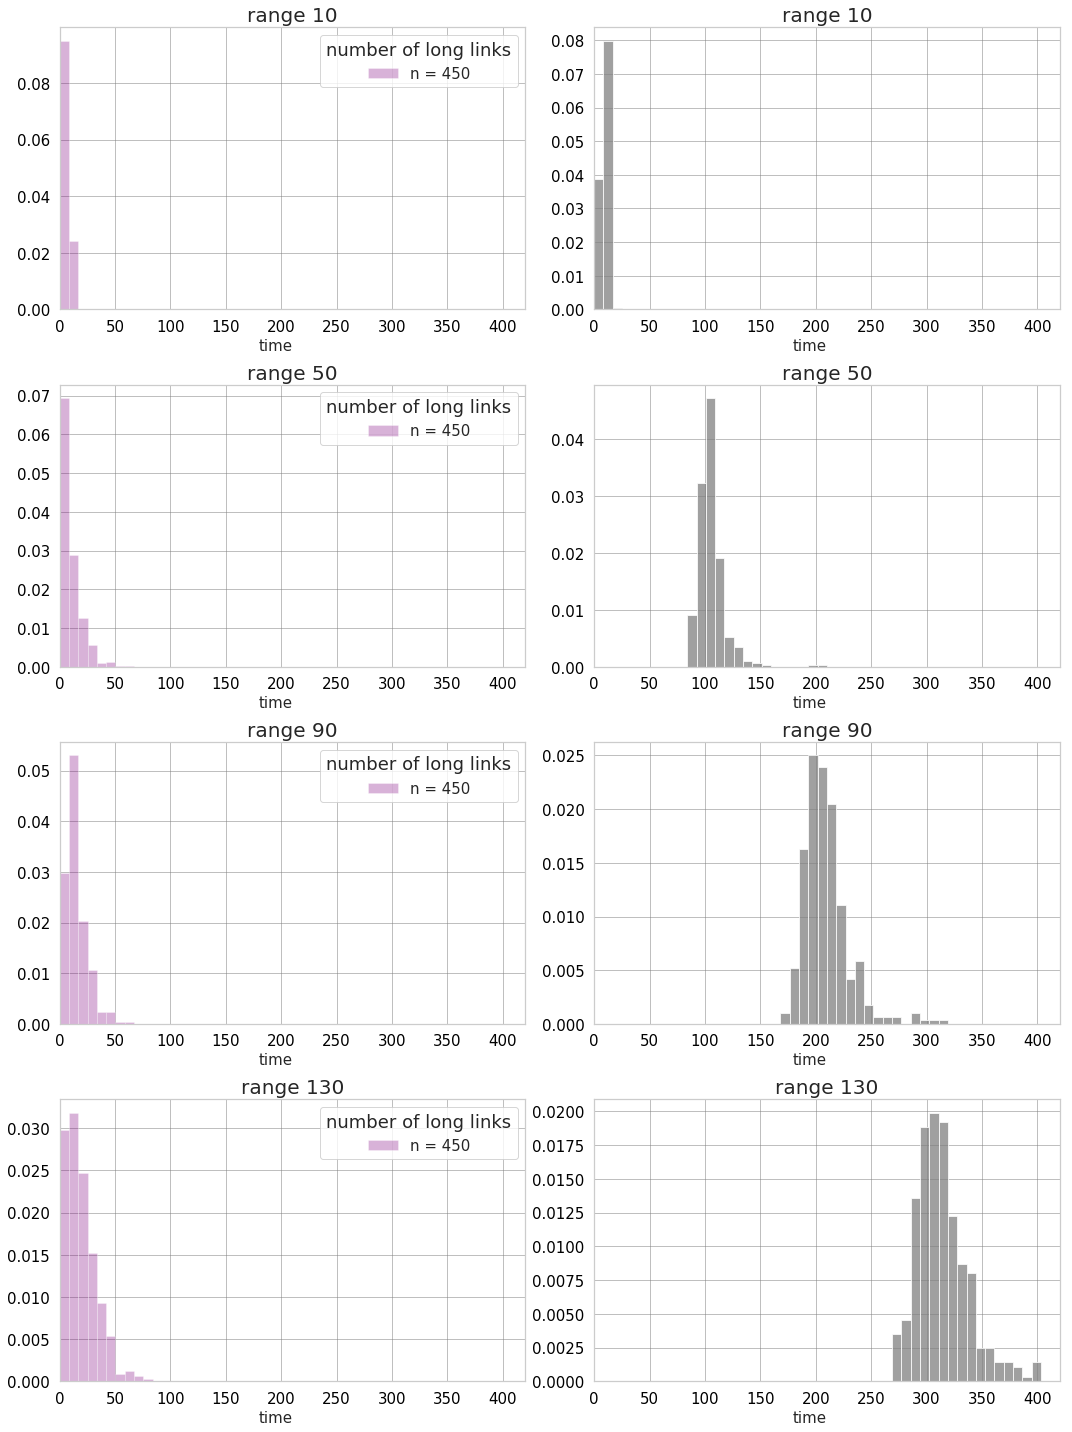

In [13]:
single_histogram(df_450, df_0, k = 50, start_value = 10, n = 450,
                 limit = [420, 420, 420, 420, 420, 420, 420])

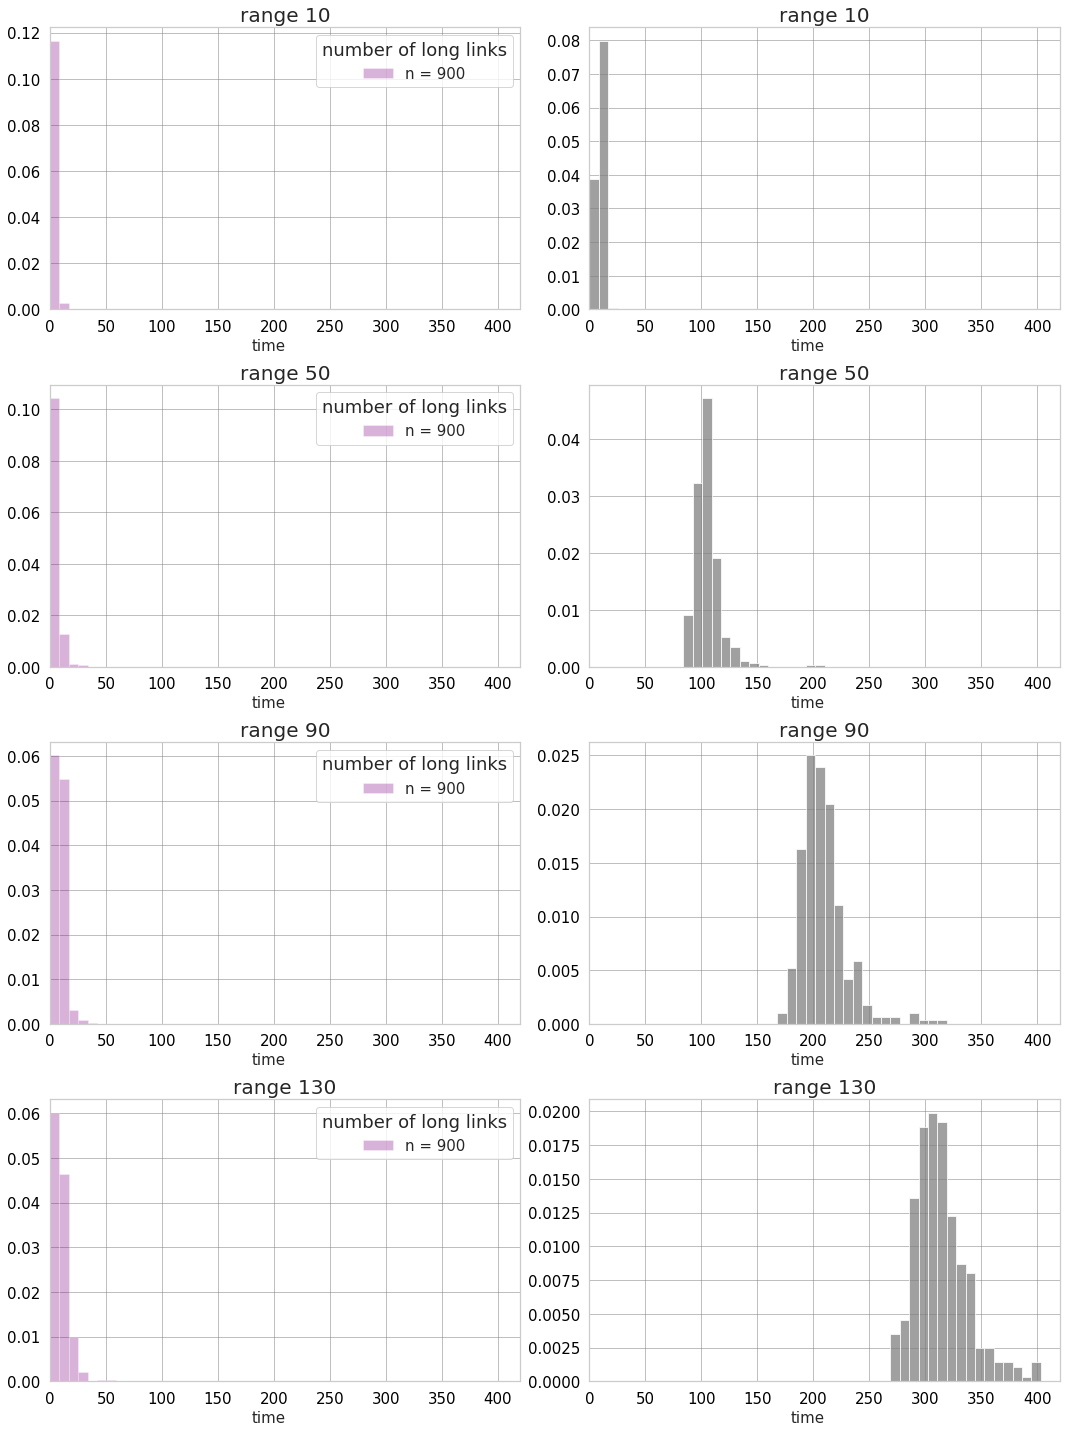

In [14]:
single_histogram(df_900, df_0, k = 50, start_value = 10, n = 900,
                 limit = [420, 420, 420, 420, 420, 420, 420])

#  All in one

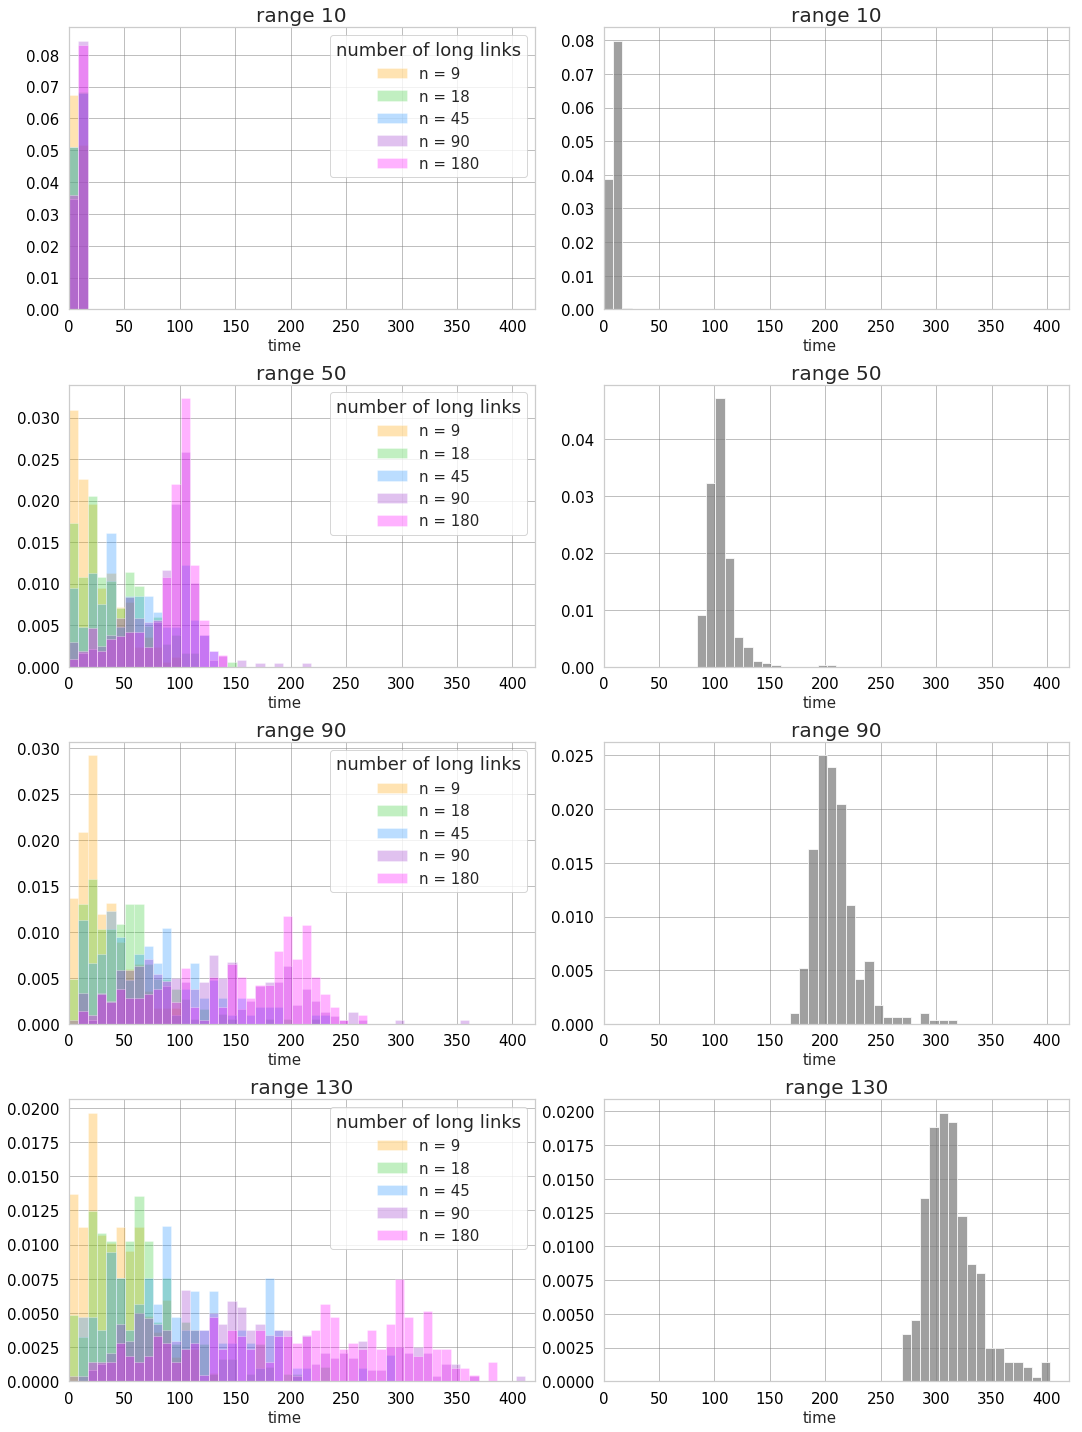

In [15]:
multi_histogram(df_9, df_18, df_45, df_90, df_180, df_0, k = 50, start_value = 10,
                limit = [420, 420, 420, 420, 420, 420, 420], filename = 'c15X50l1.png')

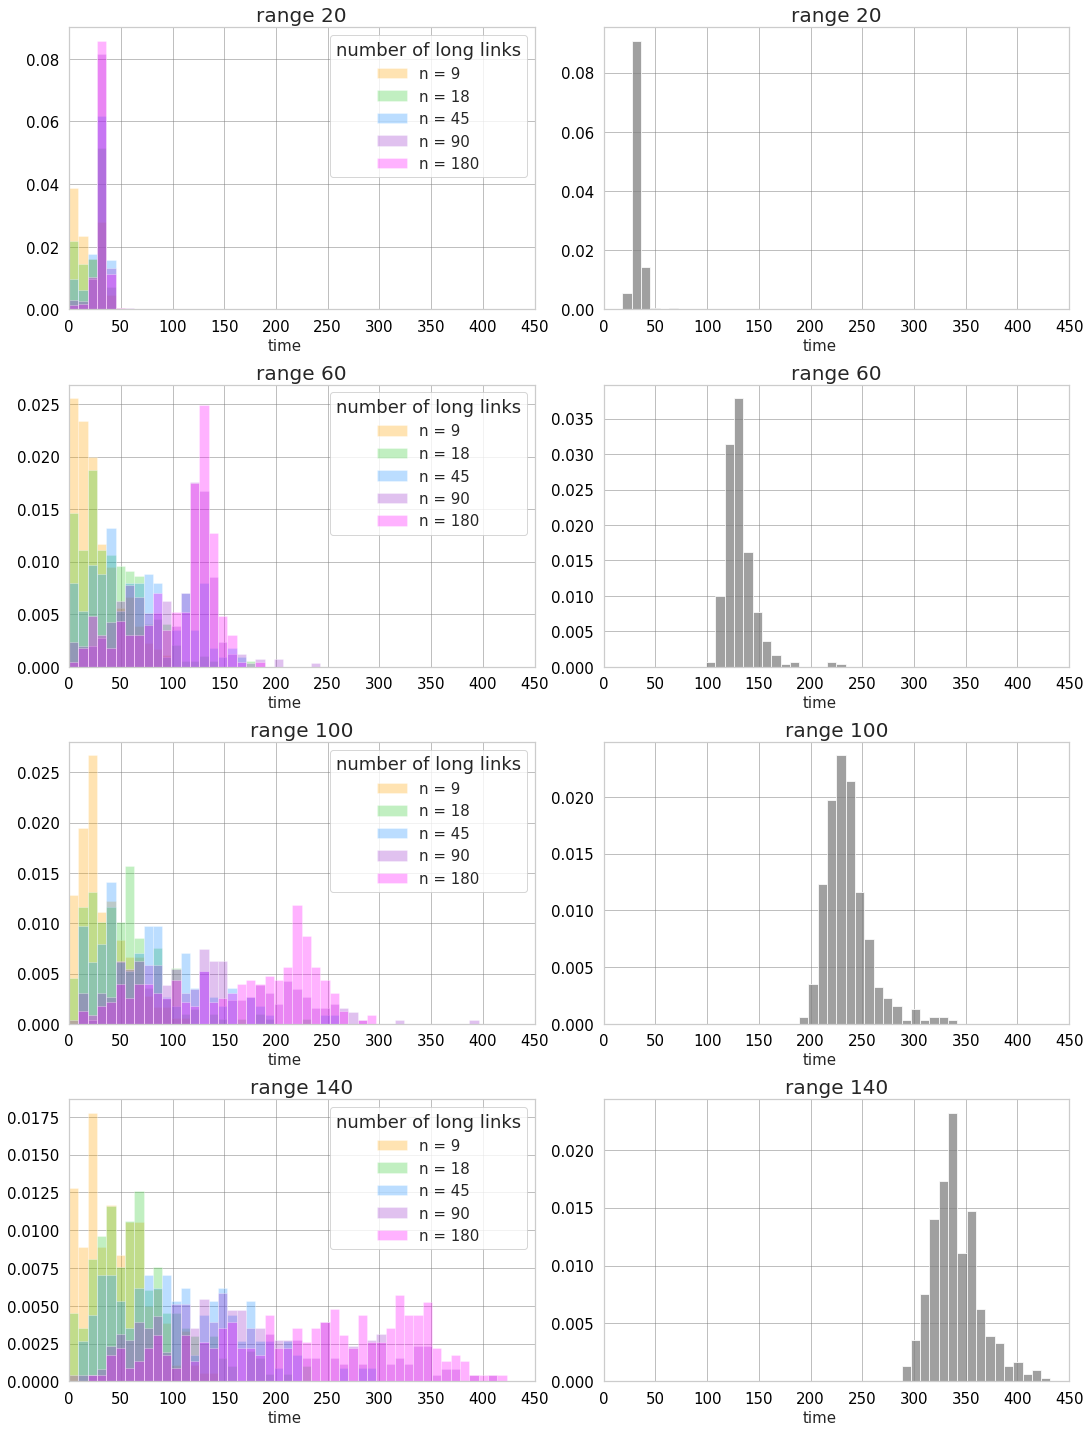

In [18]:
multi_histogram(df_9, df_18, df_45, df_90, df_180, df_0, k = 50, start_value = 20,
                limit = [450, 450, 450, 450, 450, 450, 450], filename = 'c15X50l1.png')